In [1]:
import numpy as np
import pandas as pd
import math
import sys

import matplotlib.pyplot as plt 
%matplotlib inline

import random as rand
from collections import defaultdict

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction import DictVectorizer, FeatureHasher
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score

from time import time

In [2]:
# adult_test_df = pd.read_csv('datasets/benchmark/adult_clean_test.csv')
# adult_train_df = pd.read_csv('datasets/benchmark/adult_clean_train.csv')
# titanic_test_df = pd.read_csv('datasets/benchmark/titanic_clean_test.csv')
# titanic_train_df = pd.read_csv('datasets/benchmark/titanic_clean_train.csv')
# weather_test_df = pd.read_csv('datasets/benchmark/weatherAUS_clean_test.csv')
# weather_train_df = pd.read_csv('datasets/benchmark/weatherAUS_clean_train.csv')
# wine_test_df = pd.read_csv('datasets/benchmark/wine_test.csv')
# wine_train_df = pd.read_csv('datasets/benchmark/wine_train.csv')

In [3]:
# def extract_X_y(df, col_y):
#     X = df.drop(col_y, axis=1)
#     y = df[col_y]
#     return X, y

In [4]:
# adult_test_X, adult_test_y = extract_X_y(adult_test_df, 'income_>50k')
# adult_train_X, adult_train_y = extract_X_y(adult_train_df, 'income_>50k')

# titanic_test_X, titanic_test_y = extract_X_y(titanic_test_df, 'Survived')
# titanic_train_X, titanic_train_y = extract_X_y(titanic_train_df, 'Survived')

# weather_test_X, weather_test_y = extract_X_y(weather_test_df, 'RainTomorrow')
# weather_train_X, weather_train_y = extract_X_y(weather_train_df, 'RainTomorrow')

# wine_test_X, wine_test_y = extract_X_y(wine_test_df, 'quality')
# wine_train_X, wine_train_y = extract_X_y(wine_train_df, 'quality')

In [5]:
# def df_features_to_dicts(df):
#     columns = df.columns
#     dicts = []
   
#     for index, row in df.iterrows():
#         feature_dict = {}
#         for col in columns:
#             feature_dict[col] = row[col]
#         dicts.append(feature_dict)
#     return dicts

In [6]:
# adult_test_dict_X = df_features_to_dicts(adult_test_X)
# adult_train_dict_X = df_features_to_dicts(adult_train_X)

# titanic_test_dict_X = df_features_to_dicts(titanic_test_X)
# titanic_train_dict_X = df_features_to_dicts(titanic_train_X)

# weather_test_dict_X = df_features_to_dicts(weather_test_X)
# weather_train_dict_X = df_features_to_dicts(weather_train_X)

# wine_test_dict_X = df_features_to_dicts(wine_test_X)
# wine_train_dict_X = df_features_to_dicts(wine_train_X)

In [80]:
class DataSet:
    def __init__(self, name, y_name, train_file, test_file):
        self.name = name
        
        data_path = 'datasets/normalized_benchmark/'
        self.train_df = pd.read_csv(data_path + train_file)
        self.test_df = pd.read_csv(data_path + test_file)
        
        self.X_train = self.train_df.drop(y_name, axis=1)
        self.y_train = self.train_df[y_name]
        self.X_dict_train = df_features_to_dicts(self.X_train)
        
        self.X_test = self.test_df.drop(y_name, axis=1)
        self.y_test = self.test_df[y_name]
        self.X_dict_test = df_features_to_dicts(self.X_test)
        
    def df_features_to_dicts(df):
        columns = df.columns
        dicts = []

        for index, row in df.iterrows():
            feature_dict = {}
            for col in columns:
                feature_dict[col] = row[col]
            dicts.append(feature_dict)
        return dicts

In [81]:
data_set_adult = DataSet('adult', 'income_>50k', 'adult_clean_train.csv', 'adult_clean_test.csv')
data_set_titanic = DataSet('titanic', 'Survived', 'titanic_clean_train.csv', 'titanic_clean_test.csv')
data_set_weather = DataSet('weather', 'RainTomorrow', 'weatherAUS_clean_train.csv', 'weatherAUS_clean_test.csv')
data_set_wine = DataSet('wine', 'quality', 'wine_train.csv', 'wine_test.csv')

In [82]:
print(data_set_adult.X_train.shape)
print(data_set_titanic.X_train.shape)
print(data_set_weather.X_train.shape)
print(data_set_wine.X_train.shape)

(16001, 50)
(1047, 20)
(16000, 30)
(1279, 11)


In [83]:
class EvalScore:
    def __init__(self, y_true, y_pred):
        self.y_true = y_true
        self.y_pred = y_pred
        self.acc = accuracy_score(y_true, y_pred)
        self.f1 = f1_score(y_true, y_pred)
        self.f1_neg = f1_score(1-y_true, 1-y_pred)
        self.conf = confusion_matrix(y_true, y_pred)

In [35]:
# def compute_score(model, test_X, test_y):
#     pred = model.predict(test_X)
#     acc = accuracy_score(test_y, pred)
#     f1 = f1_score(test_y, pred)
#     f1_neg = f1_score(1-test_y, 1-pred)
#     conf = confusion_matrix(test_y, pred)

#     return acc, f1, f1_neg, conf

In [84]:
def compute_score(model, X, y):
    y_pred = model.predict(X)
    return EvalScore(y, y_pred)

In [79]:
# def fit_compute_score(model, train_X, train_y, test_X, test_y):
#     t0 = time()
#     model.fit(train_X, train_y)
#     duration = time() - t0
#     train_acc, train_f1, train_f1_neg, train_conf = compute_score(model, train_X, train_y)
#     test_acc, test_f1, test_f1_neg, test_conf = compute_score(model, test_X, test_y)
#     print("duration", duration)
#     print("train accuracy", train_acc)
#     print("train f1", train_f1)
#     print("train f1 neg", train_f1_neg)
#     print("train tn, fp, fn, tp", train_conf.ravel()) 
#     print("test accuracy", test_acc)
#     print("test f1", test_f1)
#     print("test f1 neg", test_f1_neg)
#     print("test tn, fp, fn, tp", test_conf.ravel())
#     print()
    
#     return train_acc, train_f1, train_f1_neg, train_conf, test_acc, test_f1, test_f1_neg, test_conf

In [85]:
def fit_compute_score(model, X_train, y_train, X_test, y_test):
    t0 = time()
    model.fit(X_train, y_train)
    duration = time() - t0
    eval_score_train = compute_score(model, X_train, y_train)
    eval_score_test = compute_score(model, X_test, y_test)
    print("train duration", duration)
    print("train accuracy", eval_score_train.acc)
    print("train f1", eval_score_train.f1)
    print("train f1 neg", eval_score_train.f1_neg)
    print("train tn, fp, fn, tp", eval_score_train.conf.ravel()) 
    print("test accuracy", eval_score_test.acc)
    print("test f1", eval_score_test.f1)
    print("test f1 neg", eval_score_test.f1_neg)
    print("test tn, fp, fn, tp", eval_score_test.conf.ravel())
    print()
    
    return eval_score_train, eval_score_test

In [80]:
# def compare_feature_hashing(train_X, train_dict_X, train_y, test_X, test_dict_X, test_y):
#     clf_ridge_default = RidgeClassifier()
#     print('ridge_default')
#     ridge_default_train_acc, ridge_default_train_f1, ridge_default_train_conf, \
#         ridge_default_test_acc, ridge_default_test_f1, ridge_default_test_conf = \
#         fit_compute_score(clf_ridge_default, train_X, train_y, test_X, test_y)

#     n_estimators = 1000
#     clf_randfor_default = RandomForestClassifier(n_jobs=-1, n_estimators=n_estimators)
#     print('randfor_default')
#     randfor_default_train_acc, randfor_default_train_f1, randfor_default_train_conf, \
#         randfor_default_test_acc, randfor_default_test_f1, randfor_default_test_conf = \
#         fit_compute_score(clf_randfor_default, train_X, train_y, test_X, test_y)

#     ridge_train_acc = []
#     ridge_train_f1 = []
#     ridge_train_conf = []
#     ridge_test_acc = []
#     ridge_test_f1 = []
#     ridge_test_conf = []
#     randfor_train_acc = []
#     randfor_train_f1 = []
#     randfor_train_conf = []
#     randfor_test_acc = []
#     randfor_test_f1 = []
#     randfor_test_conf = []
#     for i in range(2, 11, 2):
#         percent = 0.1*i
#         n_features = math.ceil(train_X.shape[1]*percent)
#         print("hasher percent", percent, "n_features", n_features)
#         print()
#         hasher = FeatureHasher(n_features=n_features)
#         train_X_hash = hasher.fit_transform(train_dict_X)
#         test_X_hash = hasher.fit_transform(test_dict_X)

#         clf_ridge_hash = RidgeClassifier()
#         print('ridge_hash')
#         ridge_hash_train_acc, ridge_hash_train_f1, ridge_hash_train_conf, \
#             ridge_hash_test_acc, ridge_hash_test_f1, ridge_hash_test_conf = \
#             fit_compute_score(clf_ridge_hash, train_X_hash, train_y, test_X_hash, test_y)
#         ridge_train_acc.append(ridge_hash_train_acc)
#         ridge_train_f1.append(ridge_hash_train_f1)
#         ridge_train_conf.append(ridge_hash_train_conf)
#         ridge_test_acc.append(ridge_hash_test_acc)
#         ridge_test_f1.append(ridge_hash_test_f1)
#         ridge_test_conf.append(ridge_hash_test_conf)

#         clf_randfor_hash = RandomForestClassifier(n_jobs=-1, n_estimators=n_estimators)
#         print('randfor_hash')
#         randfor_hash_train_acc, randfor_hash_train_f1, randfor_hash_train_conf, \
#             randfor_hash_test_acc, randfor_hash_test_f1, randfor_hash_test_conf = \
#             fit_compute_score(clf_randfor_hash, train_X_hash, train_y, test_X_hash, test_y)
#         randfor_train_acc.append(randfor_hash_train_acc)
#         randfor_train_f1.append(randfor_hash_train_f1)
#         randfor_train_conf.append(randfor_hash_train_conf)
#         randfor_test_acc.append(randfor_hash_test_acc)
#         randfor_test_f1.append(randfor_hash_test_f1)
#         randfor_test_conf.append(randfor_hash_test_conf)
    
#     t = np.arange(2, 11, 2)

#     fig, ax = plt.subplots(2, 2, figsize=(15,10), tight_layout=True)
    
#     ax[0,0].plot(t, ridge_default_train_acc*np.ones(5), label='ridge_default')
#     ax[0,0].plot(t, randfor_default_train_acc*np.ones(5), label='randfor_default')
#     ax[0,0].plot(t, ridge_train_acc, label='ridge_hashes')
#     ax[0,0].plot(t, randfor_train_acc, label='randfor_hashes')
#     ax[0,0].set(xlabel='hash %', ylabel='accuracy', title='train')
#     ax[0,0].legend()

#     ax[0,1].plot(t, ridge_default_test_acc*np.ones(5), label='ridge_default')
#     ax[0,1].plot(t, randfor_default_test_acc*np.ones(5), label='randfor_default')
#     ax[0,1].plot(t, ridge_test_acc, label='ridge_hashes')
#     ax[0,1].plot(t, randfor_test_acc, label='randfor_hashes')
#     ax[0,1].set(xlabel='hash %', ylabel='accuracy', title='test')
#     ax[0,1].legend()
    
#     ax[1,0].plot(t, ridge_default_train_f1*np.ones(5), label='ridge_default')
#     ax[1,0].plot(t, randfor_default_train_f1*np.ones(5), label='randfor_default')
#     ax[1,0].plot(t, ridge_train_f1, label='ridge_hashes')
#     ax[1,0].plot(t, randfor_train_f1, label='randfor_hashes')
#     ax[1,0].set(xlabel='hash %', ylabel='f1', title='train')
#     ax[1,0].legend()
    
#     ax[1,1].plot(t, ridge_default_test_f1*np.ones(5), label='ridge_default')
#     ax[1,1].plot(t, randfor_default_test_f1*np.ones(5), label='randfor_default')
#     ax[1,1].plot(t, ridge_test_f1, label='ridge_hashes')
#     ax[1,1].plot(t, randfor_test_f1, label='randfor_hashes')
#     ax[1,1].set(xlabel='hash %', ylabel='f1', title='test')
#     ax[1,1].legend()

#     plt.show()

In [60]:
hasher = FeatureHasher(n_features=92)

In [61]:
X_train_hash = hasher.fit_transform(adult_train_dict_X)

In [71]:
adult_train_X.iloc[0].values

array([    22, 222993,      9,      0,      0,     54,      0,      0,
            0,      0,      1,      0,      0,      0,      0,      0,
            0,      0,      0,      1,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            1,      0,      0,      0,      0,      0,      0,      0,
            1,      0,      0,      0,      0,      0,      0,      1,
            0,      1,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      1,      0,      0], dtype=int64)

In [62]:
X_train_hash

<39073x92 sparse matrix of type '<class 'numpy.float64'>'
	with 395816 stored elements in Compressed Sparse Row format>

In [64]:
X_train_dense = X_train_hash.todense()

In [65]:
X_train_dense.shape

(39073, 92)

In [67]:
X_train_dense[0]

matrix([[ 1.00000e+00,  0.00000e+00,  0.00000e+00,  0.00000e+00,
          0.00000e+00,  0.00000e+00,  0.00000e+00,  0.00000e+00,
          0.00000e+00,  0.00000e+00,  1.00000e+00,  0.00000e+00,
          0.00000e+00,  0.00000e+00,  0.00000e+00,  0.00000e+00,
         -5.50000e+01,  0.00000e+00,  0.00000e+00,  0.00000e+00,
          0.00000e+00,  0.00000e+00,  0.00000e+00,  0.00000e+00,
          0.00000e+00,  0.00000e+00,  0.00000e+00,  0.00000e+00,
          0.00000e+00,  0.00000e+00,  0.00000e+00,  0.00000e+00,
          0.00000e+00,  0.00000e+00,  0.00000e+00,  0.00000e+00,
         -8.00000e+00,  0.00000e+00,  0.00000e+00,  0.00000e+00,
          0.00000e+00,  0.00000e+00,  0.00000e+00,  0.00000e+00,
          0.00000e+00,  0.00000e+00,  0.00000e+00,  0.00000e+00,
          0.00000e+00, -1.00000e+00,  0.00000e+00,  0.00000e+00,
          0.00000e+00,  0.00000e+00,  0.00000e+00,  0.00000e+00,
          0.00000e+00,  0.00000e+00,  0.00000e+00,  0.00000e+00,
          0.00000e+00,  2

In [86]:
def compare_feature_hashing(X_train, X_train_model, y_train, X_test, X_test_model, y_test):
    clf_ridge_all = RidgeClassifier(random_state=1)
    print('ridge_default')
    ridge_default_score_train, ridge_default_score_test = fit_compute_score(clf_ridge_all, X_train, y_train, X_test, y_test)

    n_estimators = 1000
    clf_randfor_all = RandomForestClassifier(n_jobs=-1, n_estimators=n_estimators, random_state=1)
    print('randfor_default')
    randfor_default_score_train, randfor_default_score_test = fit_compute_score(clf_randfor_all, X_train, y_train, X_test, y_test)

    ridge_train_score_all = []
    ridge_test_score_all = []
    randfor_train_score_all = []
    randfor_test_score_all = []
    for i in range(2, 11, 2):
        percent = 0.1*i
        n_features = math.ceil(X_train.shape[1]*percent)
        print("hash percent", percent, "n_features", n_features)
        print()
        hasher = FeatureHasher(n_features=n_features)
        t0 = time()
        X_train_hash = hasher.fit_transform(X_train_model)
        X_test_hash = hasher.transform(X_test_model)
        duration = time() - t0
        print("hash duration", duration)
        
        clf_ridge_hash = RidgeClassifier(random_state=1)
        print('ridge_hash')
        ridge_train_score, ridge_test_score = fit_compute_score(clf_ridge_hash, X_train_hash, y_train, X_test_hash, y_test)
        ridge_train_score_all.append(ridge_train_score)
        ridge_test_score_all.append(ridge_test_score)

        clf_randfor_hash = RandomForestClassifier(n_jobs=-1, n_estimators=n_estimators, random_state=1)
        print('randfor_hash')
        randfor_train_score, randfor_test_score = fit_compute_score(clf_randfor_hash, X_train_hash, y_train, X_test_hash, y_test)
        randfor_train_score_all.append(randfor_train_score)
        randfor_test_score_all.append(randfor_test_score)
    
    return ridge_default_score_train, ridge_default_score_test, randfor_default_score_train, randfor_default_score_test, \
        ridge_train_score_all, ridge_test_score_all, randfor_train_score_all, randfor_test_score_all


#     t = np.arange(2, 11, 2)

#     fig, ax = plt.subplots(2, 2, figsize=(15,10), tight_layout=True)
    
#     ax[0,0].plot(t, ridge_default_train_acc*np.ones(5), label='ridge_default')
#     ax[0,0].plot(t, randfor_default_train_acc*np.ones(5), label='randfor_default')
#     ax[0,0].plot(t, ridge_train_acc, label='ridge_hashes')
#     ax[0,0].plot(t, randfor_train_acc, label='randfor_hashes')
#     ax[0,0].set(xlabel='hash %', ylabel='accuracy', title='train')
#     ax[0,0].legend()

#     ax[0,1].plot(t, ridge_default_test_acc*np.ones(5), label='ridge_default')
#     ax[0,1].plot(t, randfor_default_test_acc*np.ones(5), label='randfor_default')
#     ax[0,1].plot(t, ridge_test_acc, label='ridge_hashes')
#     ax[0,1].plot(t, randfor_test_acc, label='randfor_hashes')
#     ax[0,1].set(xlabel='hash %', ylabel='accuracy', title='test')
#     ax[0,1].legend()
    
#     ax[1,0].plot(t, ridge_default_train_f1*np.ones(5), label='ridge_default')
#     ax[1,0].plot(t, randfor_default_train_f1*np.ones(5), label='randfor_default')
#     ax[1,0].plot(t, ridge_train_f1, label='ridge_hashes')
#     ax[1,0].plot(t, randfor_train_f1, label='randfor_hashes')
#     ax[1,0].set(xlabel='hash %', ylabel='f1', title='train')
#     ax[1,0].legend()
    
#     ax[1,1].plot(t, ridge_default_test_f1*np.ones(5), label='ridge_default')
#     ax[1,1].plot(t, randfor_default_test_f1*np.ones(5), label='randfor_default')
#     ax[1,1].plot(t, ridge_test_f1, label='ridge_hashes')
#     ax[1,1].plot(t, randfor_test_f1, label='randfor_hashes')
#     ax[1,1].set(xlabel='hash %', ylabel='f1', title='test')
#     ax[1,1].legend()

#     plt.show()

In [101]:
def plot_scores(scores, feature_size, dataset_name):
    ridge_default_score_train, ridge_default_score_test, randfor_default_score_train, randfor_default_score_test, \
        ridge_train_score_all, ridge_test_score_all, randfor_train_score_all, randfor_test_score_all = scores
    
    t = np.ceil(np.arange(0.2, 1.1, 0.2)*feature_size).astype(int)

    fig, ax = plt.subplots(1, 2, figsize=(15,5), tight_layout=True)
    
    ax[0].plot(t, ridge_default_score_test.acc*np.ones(len(t)), '-o', label='Ridge Full', color='navy')
    ax[0].plot(t, [score.acc for score in ridge_test_score_all], '-o', label='Ridge Select Hash', color='lightsteelblue')
    ax[0].plot(t, randfor_default_score_test.acc*np.ones(len(t)), '-o', label='RF Full', color='maroon')
    ax[0].plot(t, [score.acc for score in randfor_test_score_all], '-o', label='RF Select Hash', color='lightcoral')
    ax[0].set(xlabel='Number of Selected Features', ylabel='Accuracy', title='Feature Hashing Performance: {} Dataset'.format(dataset_name))
    ax[0].legend()
    
#     ax[0, 1].set_visible(False)
    
    ax[1].plot(t, ridge_default_score_test.f1*np.ones(len(t)), '-o', label='Ridge Full', color='navy')
    ax[1].plot(t, [score.f1 for score in ridge_test_score_all], '-o', label='Ridge Select Hash', color='lightsteelblue')
    ax[1].plot(t, randfor_default_score_test.f1*np.ones(len(t)), '-o', label='RF Full', color='maroon')
    ax[1].plot(t, [score.f1 for score in randfor_test_score_all], '-o', label='RF Select Hash', color='lightcoral')
    ax[1].set(xlabel='Number of Selected Features', ylabel='F1 Score', title='Feature Hashing Performance: {} Dataset'.format(dataset_name))
    ax[1].legend()

#     ax[1, 1].plot(t, ridge_default_score_test.f1_neg*np.ones(len(t)), label='ridge_default')
#     ax[1, 1].plot(t, [score.f1_neg for score in ridge_test_score_all], label='ridge_hashes')
#     ax[1, 1].plot(t, randfor_default_score_test.f1_neg*np.ones(len(t)), label='randfor_default')
#     ax[1, 1].plot(t, [score.f1_neg for score in randfor_test_score_all], label='randfor_hashes')
#     ax[1, 1].set(xlabel='hash %', ylabel='negative f1', title='negative f1')
#     ax[1, 1].legend()

    plt.show()

In [87]:
adult_scores = compare_feature_hashing(data_set_adult.X_train, data_set_adult.X_dict_train, data_set_adult.y_train, data_set_adult.X_test, data_set_adult.X_dict_test, data_set_adult.y_test)

ridge_default
train duration 0.02997303009033203
train accuracy 0.8387600774951566
train f1 0.5944671486953789
train f1 neg 0.8993759750390015
train tn, fp, fn, tp [11530   671  1909  1891]
test accuracy 0.8352953219367386
test f1 0.6004469828656569
test f1 neg 0.8962671652375733
test tn, fp, fn, tp [6951  411 1198 1209]

randfor_default
train duration 6.13853120803833
train accuracy 1.0
train f1 1.0
train f1 neg 1.0
train tn, fp, fn, tp [12201     0     0  3800]
test accuracy 0.8550516941345071
test f1 0.6741831569259089
test f1 neg 0.9067930489731438
test tn, fp, fn, tp [6888  474  942 1465]

hash percent 0.2 n_features 10

hash duration 0.30202507972717285
ridge_hash
train duration 0.02097296714782715
train accuracy 0.7529529404412224
train f1 0.11940298507462688
train f1 neg 0.8563224657434667
train tn, fp, fn, tp [11780   421  3532   268]
test accuracy 0.7454191831303102
test f1 0.1258347978910369
test f1 neg 0.8510153956748339
test tn, fp, fn, tp [7103  259 2228  179]

randfor_ha

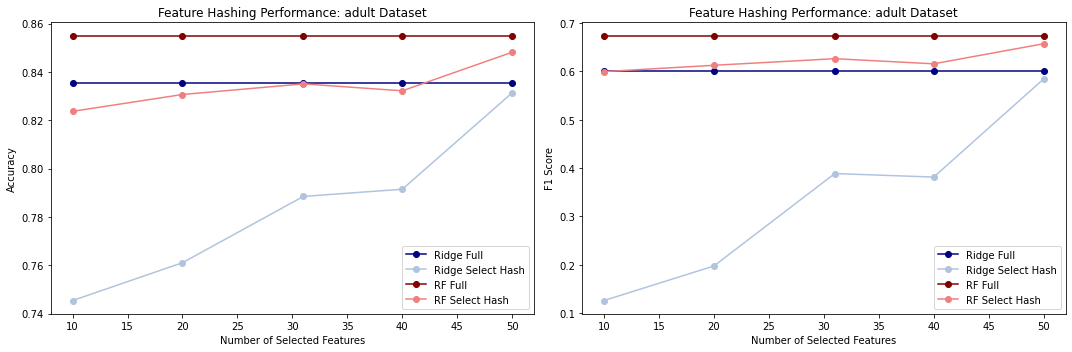

In [102]:
plot_scores(adult_scores, data_set_adult.X_train.shape[1], data_set_adult.name)

In [89]:
titanic_scores = compare_feature_hashing(data_set_titanic.X_train, data_set_titanic.X_dict_train, data_set_titanic.y_train, data_set_titanic.X_test, data_set_titanic.X_dict_test, data_set_titanic.y_test)

ridge_default
train duration 0.006005048751831055
train accuracy 0.8538681948424068
train f1 0.7994757536041939
train f1 neg 0.8850488354620586
train tn, fp, fn, tp [589  70  83 305]
test accuracy 0.8664122137404581
test f1 0.8223350253807108
test f1 neg 0.892966360856269
test tn, fp, fn, tp [146  10  25  81]

randfor_default
train duration 2.0165233612060547
train accuracy 0.9808978032473734
train f1 0.9738903394255876
train f1 neg 0.9849397590361446
train tn, fp, fn, tp [654   5  15 373]
test accuracy 0.8244274809160306
test f1 0.7628865979381443
test f1 neg 0.8606060606060606
test tn, fp, fn, tp [142  14  32  74]

hash percent 0.2 n_features 4

hash duration 0.0149993896484375
ridge_hash
train duration 0.015002012252807617
train accuracy 0.6953199617956065
train f1 0.44133099824868655
train f1 neg 0.7905449770190414
train tn, fp, fn, tp [602  57 262 126]
test accuracy 0.6221374045801527
test f1 0.2773722627737226
test f1 neg 0.744186046511628
test tn, fp, fn, tp [144  12  87  19]

r

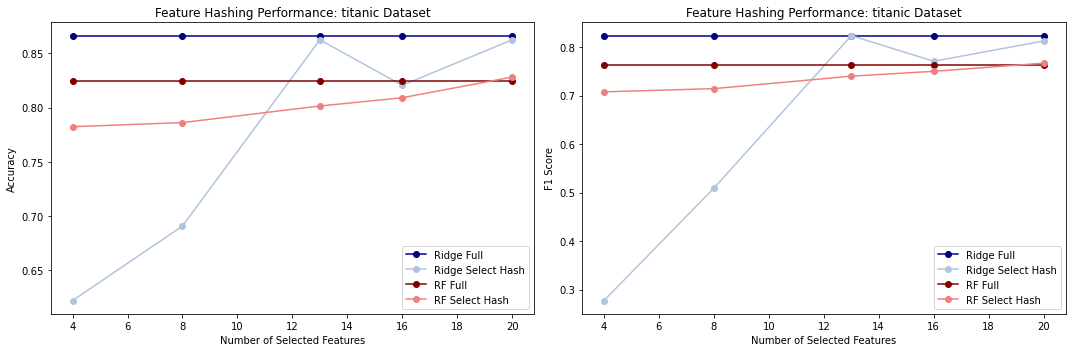

In [103]:
plot_scores(titanic_scores, data_set_titanic.X_train.shape[1], data_set_titanic.name)

In [91]:
weather_scores = compare_feature_hashing(data_set_weather.X_train, data_set_weather.X_dict_train, data_set_weather.y_train, data_set_weather.X_test, data_set_weather.X_dict_test, data_set_weather.y_test)

ridge_default
train duration 0.020003318786621094
train accuracy 0.7865
train f1 0.7819481680071493
train f1 neg 0.7908656789518794
train tn, fp, fn, tp [6459 1539 1877 6125]
test accuracy 0.78525
test f1 0.7792341300436905
test f1 neg 0.7909467023606717
test tn, fp, fn, tp [1625  377  482 1516]

randfor_default
train duration 8.042996168136597
train accuracy 1.0
train f1 1.0
train f1 neg 1.0
train tn, fp, fn, tp [7998    0    0 8002]
test accuracy 0.81025
test f1 0.810675979047144
test f1 neg 0.8098220997243799
test tn, fp, fn, tp [1616  386  373 1625]

hash percent 0.2 n_features 6

hash duration 0.13200139999389648
ridge_hash
train duration 0.01200246810913086
train accuracy 0.72675
train f1 0.7170958975022648
train f1 neg 0.7357669527378217
train tn, fp, fn, tp [6087 1911 2461 5541]
test accuracy 0.731
test f1 0.7208095485210171
test f1 neg 0.7404727448142788
test tn, fp, fn, tp [1535  467  609 1389]

randfor_hash
train duration 24.85022258758545
train accuracy 1.0
train f1 1.0
tra

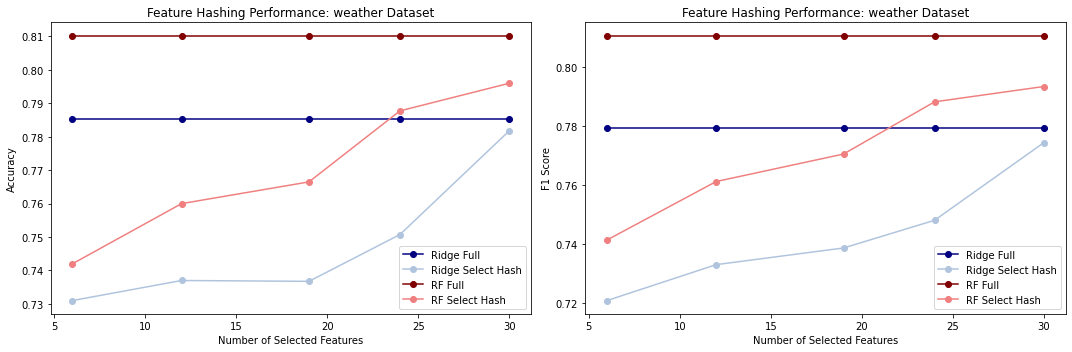

In [104]:
plot_scores(weather_scores, data_set_weather.X_train.shape[1], data_set_weather.name)

In [93]:
wine_scores = compare_feature_hashing(data_set_wine.X_train, data_set_wine.X_dict_train, data_set_wine.y_train, data_set_wine.X_test, data_set_wine.X_dict_test, data_set_wine.y_test)

ridge_default
train duration 0.005972623825073242
train accuracy 0.7498045347928068
train f1 0.7615499254843517
train f1 neg 0.736842105263158
train tn, fp, fn, tp [448 148 172 511]
test accuracy 0.740625
test f1 0.7477203647416415
test f1 neg 0.7331189710610932
test tn, fp, fn, tp [114  34  49 123]

randfor_default
train duration 2.050335645675659
train accuracy 1.0
train f1 1.0
train f1 neg 1.0
train tn, fp, fn, tp [596   0   0 683]
test accuracy 0.81875
test f1 0.8242424242424243
test f1 neg 0.8129032258064517
test tn, fp, fn, tp [126  22  36 136]

hash percent 0.2 n_features 3

hash duration 0.006003856658935547
ridge_hash
train duration 0.0029931068420410156
train accuracy 0.6325254104769351
train f1 0.705513784461153
train f1 neg 0.5114345114345114
train tn, fp, fn, tp [246 350 120 563]
test accuracy 0.615625
test f1 0.6854219948849104
test f1 neg 0.5060240963855422
test tn, fp, fn, tp [ 63  85  38 134]

randfor_hash
train duration 2.4236674308776855
train accuracy 1.0
train f1 1

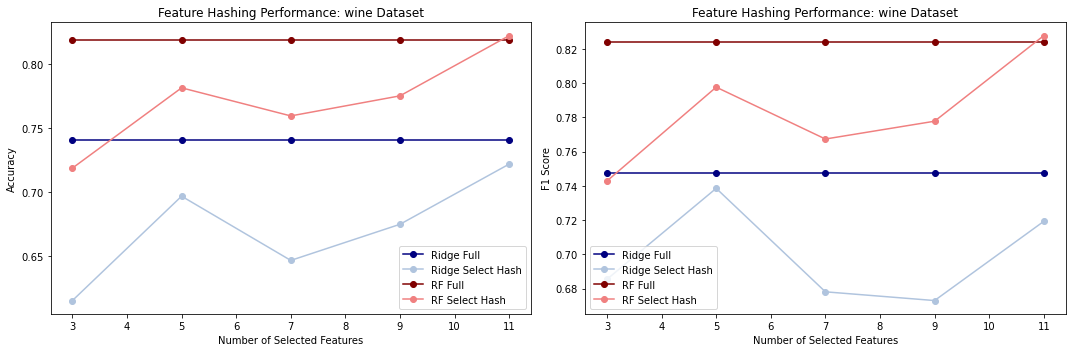

In [105]:
plot_scores(wine_scores, data_set_wine.X_train.shape[1], data_set_wine.name)